<a href="https://colab.research.google.com/github/ky3wa/AI-Based-Anomaly-Detection-in-Web-Logs/blob/main/AI_based_abnormality_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
#pandas : A fundamental tool for handling tabular data

# Sample log data (online CSV) - Not related to abnormal log
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# View the first 5 rows
df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


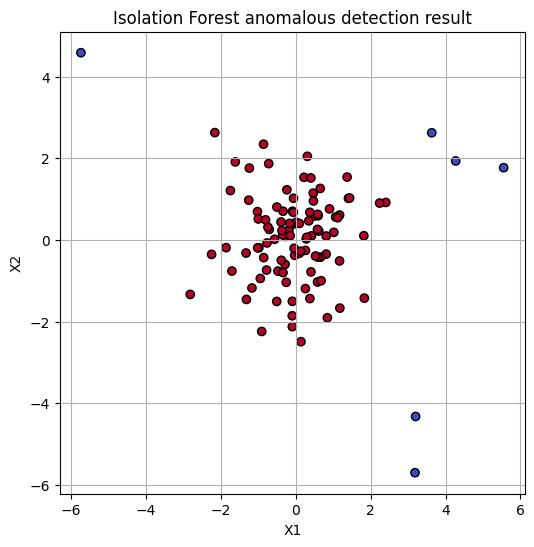

In [9]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate 100 normal data points (2D)
normal_data = np.random.randn(100, 2)

# 2. Generate 5 outlier data points
outliers = np.random.uniform(low=-6, high=6, size=(5, 2))

# 3. Combine both datasets
X = np.vstack([normal_data, outliers])

# 4. Train the model
model = IsolationForest(contamination=0.05)  # Assume approximately 5% are outliers
model.fit(X)

# 5. Make predictions
pred = model.predict(X)  # 1: Normal, -1: Anomaly

# 6. Visualize the results
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap="coolwarm", edgecolors='k')
plt.title("Isolation Forest anomalous detection result")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


In [10]:
import pandas as pd
import requests
import re

# 1. Load log text
url = "https://raw.githubusercontent.com/elastic/examples/master/Common%20Data%20Formats/nginx_logs/nginx_logs"
response = requests.get(url)
log_lines = response.text.strip().split("\n")

# 2. Parse using regular expressions
pattern = r'(?P<ip>\d+\.\d+\.\d+\.\d+) - - \[(?P<time>.*?)\] "(?P<method>\w+) (?P<url>.*?) .*" (?P<status>\d+)'

parsed = []
for line in log_lines:
    match = re.match(pattern, line)
    if match:
        parsed.append(match.groupdict())

# 3. Create a DataFrame
df = pd.DataFrame(parsed)

# 4. Preview the data
df.head()


,ip,time,method,url,status
0,93.180.71.3,17/May/2015:08:05:32 +0000,GET,/downloads/product_1,304
1,93.180.71.3,17/May/2015:08:05:23 +0000,GET,/downloads/product_1,304
2,80.91.33.133,17/May/2015:08:05:24 +0000,GET,/downloads/product_1,304
3,217.168.17.5,17/May/2015:08:05:34 +0000,GET,/downloads/product_1,200
4,217.168.17.5,17/May/2015:08:05:09 +0000,GET,/downloads/product_2,200


In [11]:
# 1. Convert status to numeric
df["status"] = df["status"].astype(int)

# 2. Filter only 404 responses
df_404 = df[df["status"] == 404]

# 3. Count 404 responses per IP
ip_404_counts = df_404["ip"].value_counts().reset_index()
ip_404_counts.columns = ["ip", "404_count"]

# 4. Preview the results
ip_404_counts.head()


,ip,404_count
0,216.46.173.126,1570
1,180.179.174.219,1285
2,65.39.197.164,997
3,74.125.60.158,898
4,80.91.33.133,870


In [12]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1. Prepare numeric data for model training
X = ip_404_counts[["404_count"]]

# 2. Define and train Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)  # Treat the top 10% as outliers
model.fit(X)

# 3. Prediction: -1 is anomaly, 1 is normal
ip_404_counts["anomaly"] = model.predict(X)

# 4. Check the results
ip_404_counts.head()


,ip,404_count,anomaly
0,216.46.173.126,1570,-1
1,180.179.174.219,1285,-1
2,65.39.197.164,997,-1
3,74.125.60.158,898,-1
4,80.91.33.133,870,-1


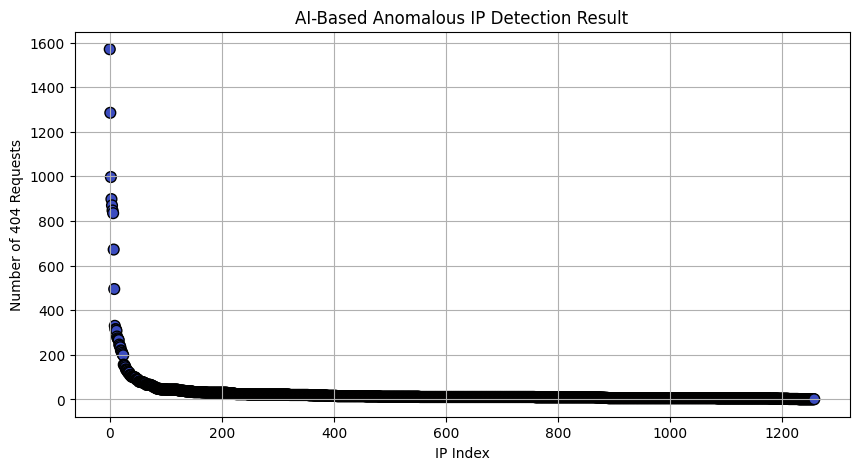

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(ip_404_counts.index, ip_404_counts["404_count"],
            c=ip_404_counts["anomaly"], cmap="coolwarm", s=60, edgecolors="k")
plt.title("AI-Based Anomalous IP Detection Result")
plt.xlabel("IP Index")
plt.ylabel("Number of 404 Requests")
plt.grid(True)
plt.show()
